# Imports

In [2]:
import importlib
import functions as f  # Our defined functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
from tqdm.notebook import tqdm
import os
import math
import time

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

importlib.reload(f)

GRatio = (1 + 5 ** .5) / 2

WIDTH = .5
DASH = (10, 10)


# Solving models

Model verified.
Writing model to file models/SI.json.
File name already exists.
Overwriting file.


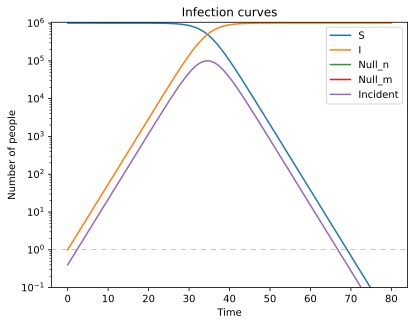

Pop variation: 0

Computation of R0
Model verified.
Writing model to file models/SI.json.
File name already exists.
Overwriting file.

Creating new model!
New model created in 0.0e+00 seconds.

Véfication faite, les deux modèles sont identiques.
R0 computation done

{'Rt(S,I)': 13.815511372280978}


In [26]:
importlib.reload(f)

for modelName in ['SI']:

    t_final = {
        'SIRS_vars': 150,
        'SIRS_deaths': 120,
        'SIR_test3': 150,
        'SIS_deaths_2': 150,
        'SIS': 100,
        'SI': 80
    }
    model = f.loadModel(modelName)
    solution, t_span = f.solve(model, (0, t_final[modelName]), 100)

    # SIRS_deaths2 = f.mod(SIRS_deaths)
    # solution2, t_span2 = f.solve(SIRS_deaths2, (0, 200), 100)

    fig = plt.figure()
    f.plotCurves(t_span,
                 np.transpose(solution),
                 toPlot=list(range(solution.shape[1])),
                 labels=f.getCompartments(model))
    plt.plot(t_span, f.infCurve(model, solution, t_span), label='Incident')
    plt.ylim(bottom=.1)
    plt.legend(loc='best')
    plt.axhline(y=1, linestyle='--', color='grey',
                linewidth=WIDTH, dashes=DASH)
    plt.yscale('log')
    plt.show()

    popChange = f.getPopChange(model, solution)
    print(f"Pop variation: {popChange:.0f}")

    f.mod(model)

    model, modelMod, _, r0 = f.computeR0(
        modelName, (0, 300), printInit=False, printWarnings=False,
        scaledInfs=False)

    print(r0)


# $\mathcal{R}_t$ curves

  0%|          | 0/31 [00:00<?, ?it/s]

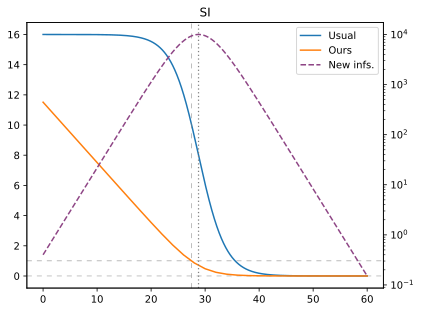

In [20]:
importlib.reload(f)

for name in ['SI']:

    tupleTimes = {
        'SIR_deaths': (0, 80),
        'SIR_vars': (40, 90),
        'SIR_test2': (0, 175),
        'SIRS_vacc_morts': (0, 200),
        'SI': (0, 60)
    }
    infectedTabs = {
        'SIR_deaths': [1],
        'SIR_vars': [1, 2],
        'SIR_test2': [1, 2],
        'SIRS_vacc_morts': [1],
        'SI': [1]
    }
    r0Values = {
        'SIR_deaths': 4,
        'SIR_vars': 10,
        'SIR_test2': 4,
        'SIRS_vacc_morts': 32 / 15,
        'SI': 16
    }
    legendLoc = {
        'SIR_deaths': 'center left',
        'SIR_vars': 'center left',
        'SIR_test2': 'center left',
        'SIRS_vacc_morts': 'lower right',
        'SI': 'best'
    }

    rtCurves = \
        f.compare(name, tupleTimes[name], 1/2, R0=r0Values[name],
                  plotANA=True, plotANA_v2=False,
                  susceptibles=[0], infected=infectedTabs[name],
                  plotBound=False, legendLoc=legendLoc[name])
    plt.show()


In [23]:
importlib.reload(f)

for name in  \
    ['SIS_deaths', 'SIS_vacc',
     'SIRS_deaths', 'SIS_deaths_2',
     'SIR_vars', 'SIR_test2',
     'SIR_deaths', 'SIR_test', 'SIR',
     'SIR_test3', 'SIRS_vars', 'SIRS_vacc_morts']:

    measures = {
        'layerDistance': 1,
        'nodeDistance': 2,
        'varDistance': .25,
        'nullDistance': .8,
        'baseAngle': 10,
        'contactPositions': ("2/5", "3/5"),
        'scale': .6
    }

    # f.printModel(f.loadModel(name, True, False))

    f.createLaTeX(f.loadModel(name, True, False), **measures)

    f.createLaTeX(f.mod(f.loadModel(name, True, False),
                        overWrite=True), **measures)


\label{SIS_deaths_Tikz}
\label{SIS_deaths_mod_Tikz}
\label{SIS_vacc_Tikz}
\label{SIS_vacc_mod_Tikz}
\label{SIRS_deaths_Tikz}
\label{SIRS_deaths_mod_Tikz}
\label{SIS_deaths_2_Tikz}
\label{SIS_deaths_2_mod_Tikz}
\label{SIR_vars_Tikz}
\label{SIR_vars_mod_Tikz}
\label{SIR_test2_Tikz}
\label{SIR_test2_mod_Tikz}
\label{SIR_deaths_Tikz}
\label{SIR_deaths_mod_Tikz}
\label{SIR_test_Tikz}
\label{SIR_test_mod_Tikz}
\label{SIR_Tikz}
\label{SIR_mod_Tikz}
\label{SIR_test3_Tikz}
\label{SIR_test3_mod_Tikz}
\label{SIRS_vars_Tikz}
\label{SIRS_vars_mod_Tikz}
\label{SIRS_vacc_morts_Tikz}
\label{SIRS_vacc_morts_mod_Tikz}
